Importing Libraries - Tensorflow, keras, LSTM, MinMaxScaler, Matplotlib

In [3]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time #helper libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Read csv file

In [4]:
import pandas as pd
df3 = pd.read_csv('/content/Amazon.csv')
df3 = df3.dropna(axis = "columns")
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


Reshaping Close column - Univariate Time Series Analysis

<ipython-input-7-45ebed1208fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Date'] = pd.to_datetime(df_close['Date'])


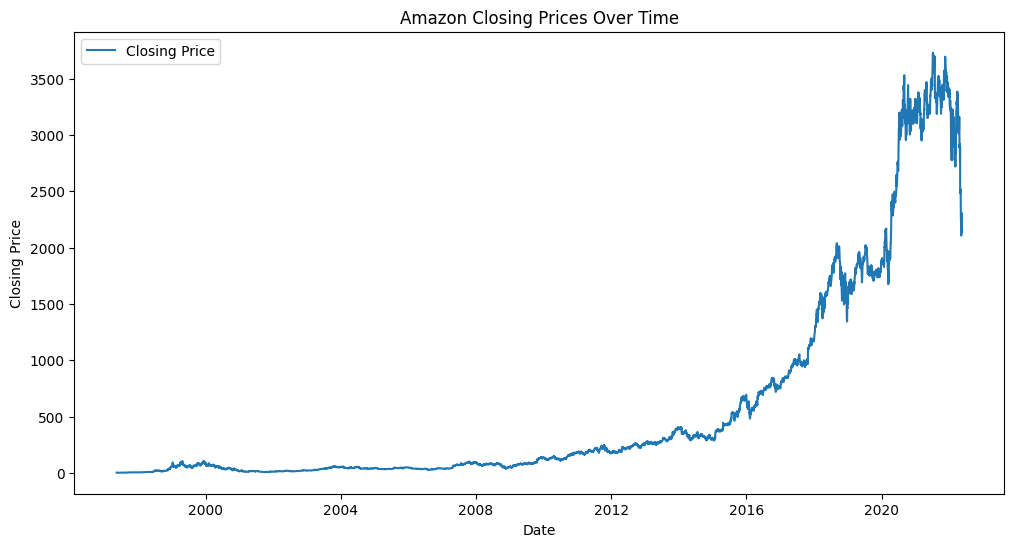

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Extract Date and Close columns from the DataFrame
df_close = df3[['Date', 'Close']]

# Ensure the Date column is in datetime format
df_close['Date'] = pd.to_datetime(df_close['Date'])

# Plotting the closing prices with date
plt.figure(figsize=(12, 6))
plt.plot(df_close['Date'], df_close['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Amazon Closing Prices Over Time')
plt.legend()
plt.show()

Plotting the Close column

Check for Stationarity using ADF Test

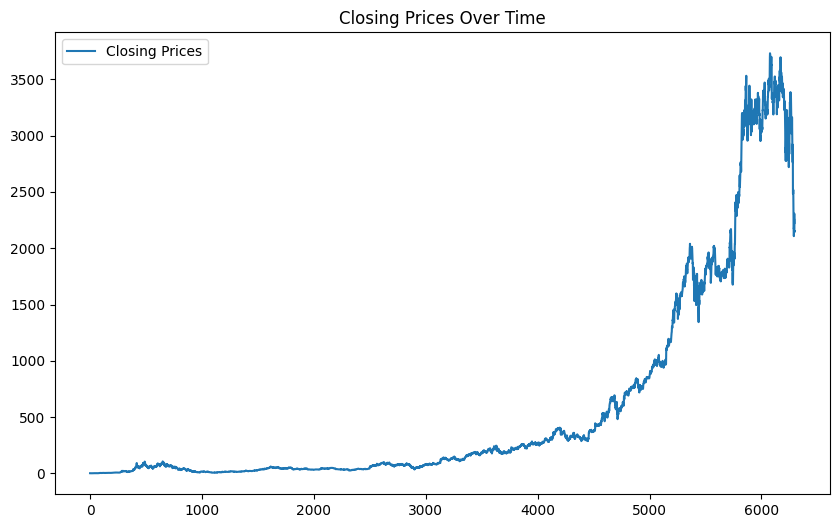

ADF Statistic: 0.0900029991803167
p-value: 0.9653718871351318
Critical Value 1%: -3.4313947113763845
Critical Value 5%: -2.862001669939781
Critical Value 10%: -2.5670157439442236
The time series is not stationary (fail to reject the null hypothesis).


In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the reshaped close prices into a pandas Series for easier manipulation
df_close_series = pd.Series(df_close['Close'], name='Close')
# Plot the series to visually inspect seasonality and trend
plt.figure(figsize=(10, 6))
plt.plot(df_close_series, label='Closing Prices')
plt.title('Closing Prices Over Time')
plt.legend()
plt.show()
# Checking Stationarity: Augmented Dickey-Fuller (ADF) Test
result = adfuller(df_close_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

Check for Seasonality

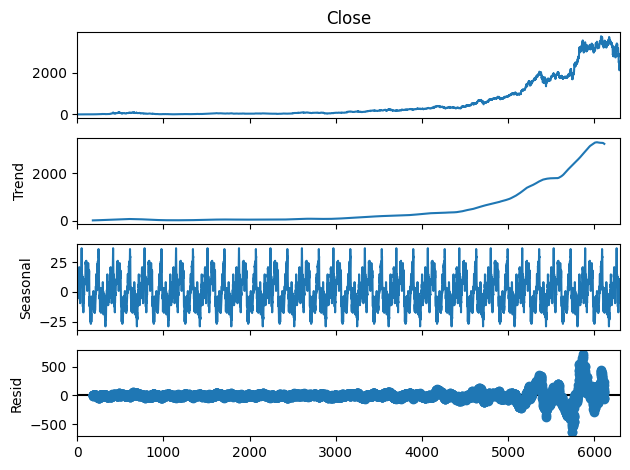

Seasonal Component:
0   -6.333598
1   -0.471971
2   -3.143363
3   -2.222933
4    0.483390
Name: seasonal, dtype: float64


In [13]:
# Checking Seasonality: Seasonal Decomposition of Time Series (STL or Classical)
# We can use 'additive' or 'multiplicative' models based on the nature of the seasonality
decomposition = seasonal_decompose(df_close_series, model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

# Extract and analyze the seasonal component
seasonal_component = decomposition.seasonal
trend_component = decomposition.trend
residual_component = decomposition.resid

print("Seasonal Component:")
print(seasonal_component.dropna().head())

In [30]:
import pandas as pd

import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate monthly sales data

np.random.seed(0)

date_range = pd.date_range(start='2020-01-01', periods=120, freq='M')

sales_data = pd.Series(np.random.randint(100, 200, size=len(date_range)), index=date_range, name='Sales')

# Fit a SARIMA model

model_sarima = SARIMAX(df_close_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

result_sarima = model_sarima.fit()

print(result_sarima.summary())

<ipython-input-30-1a59bd25438d>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=120, freq='M')


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 6297
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -28534.699
Date:                            Wed, 13 Nov 2024   AIC                          57079.398
Time:                                    06:19:58   BIC                          57113.127
Sample:                                         0   HQIC                         57091.084
                                           - 6297                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6439      0.043    -14.959      0.000      -0.728      -0.560
ma.L1          0.6011      0.045   

In [35]:
import numpy as np

import pandas as pd

# Example data

np.random.seed(0)

date_range = pd.date_range(start='1997-01-01', periods=120, freq='M')

#sales_data = pd.Series(np.random.randint(100, 200, size=len(date_range)), index=date_range, name='Sales')

# Calculating errors

mean_sales = df_close_series.mean()

seasonal_estimates = np.full_like(df_close_series, mean_sales)
# Placeholder for actual seasonal estimates

residuals = df_close_series - seasonal_estimates

# Sum of Squared Errors for the seasonal component

sum_of_squared_errors_seasonal = np.sum(residuals**2)

# Total errors could similarly be defined; here using the same as an example

sum_of_squared_errors_total = sum_of_squared_errors_seasonal
# This should be based on a different calculation

# Metrics calculation

max_value = df_close_series.max()

min_value = df_close_series.min()

standard_deviation = df_close_series.std()

mean_value = df_close_series.mean()

seasonality_index = (max_value - min_value) / (max_value + min_value)

coefficient_of_variation = standard_deviation / mean_value

percentage_variation_explained = (sum_of_squared_errors_seasonal / sum_of_squared_errors_total) * 100

# Setting thresholds

thresholds = {

'seasonality_index': 0.5,

'coefficient_of_variation': 0.1,

'percentage_variation_explained': 70

}

# Evaluating seasonality

results = {

"Strong seasonality detected": seasonality_index > thresholds['seasonality_index'],

"Low variability, indicating significant seasonality": coefficient_of_variation < thresholds['coefficient_of_variation'],

"Seasonality explains a large portion of the variation in the data": percentage_variation_explained > thresholds['percentage_variation_explained']

}
results

<ipython-input-35-b447505cebbc>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1997-01-01', periods=120, freq='M')


{'Strong seasonality detected': True,
 'Low variability, indicating significant seasonality': False,
 'Seasonality explains a large portion of the variation in the data': True}

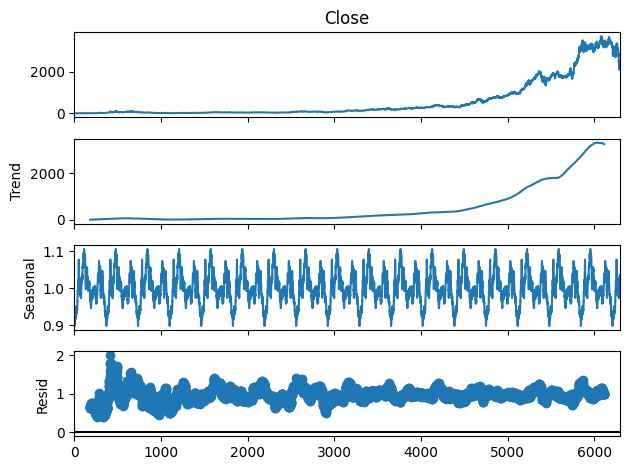

Seasonal Component:
0    0.934890
1    0.933356
2    0.924346
3    0.924388
4    0.905602
Name: seasonal, dtype: float64


In [29]:
# Checking Seasonality: Seasonal Decomposition of Time Series (STL or Classical)
# We can use 'additive' or 'multiplicative' models based on the nature of the seasonality
decomposition = seasonal_decompose(df_close_series, model='multiplicative', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

# Extract and analyze the seasonal component
seasonal_component = decomposition.seasonal
trend_component = decomposition.trend
residual_component = decomposition.resid

print("Seasonal Component:")
print(seasonal_component.dropna().head())

Scaling and splitting Data into Train Test

In [16]:
# Step 2: Scale the Close Prices (df_close) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_close_scaled = scaler.fit_transform(df_close[['Close']])

# Step 3: Train-Test Split
train_size = int(len(df_close_scaled) * 0.80)
test_size = len(df_close_scaled) - train_size
train, test = df_close_scaled[0:train_size, :], df_close_scaled[train_size:len(df_close_scaled), :]
print(f"Train size: {len(train)}, Test size: {len(test)}")

# Step 4: Extract corresponding seasonal component for train/test sets
# Convert seasonal component to numpy array and ensure it's the same length as df_close
seasonal_component_scaled = scaler.fit_transform(seasonal_component.values.reshape(-1, 1))

# Split the seasonal component
train_seasonal = seasonal_component_scaled[0:train_size]
test_seasonal = seasonal_component_scaled[train_size:len(df_close_scaled)]

# Step 5: Merge residual (train/test) with the seasonal component
# Combine both seasonal and scaled close prices
train_combined = train + train_seasonal
test_combined = test + test_seasonal

# Step 6: Prepare data for LSTM
# You can now use train_combined and test_combined for LSTM training
print(f"Train Combined Shape: {train_combined.shape}")
print(f"Test Combined Shape: {test_combined.shape}")

Train size: 5037, Test size: 1260
Train Combined Shape: (5037, 1)
Test Combined Shape: (1260, 1)


In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close[['Close']])
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

5037 1260


Transforming into supervised learning data by creating input-output pairs based on a specified look_back period, optionally skipping data points with differences exceeding a defined threshold.

In [20]:
def create_dataset(dataset, look_back=1, threshold=None):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        # Check the difference between the current value and the last value in the input window
        if threshold is not None:
            if np.abs(dataset[i + look_back, 0] - dataset[i + look_back - 1, 0]) > threshold:
                continue  # Skip this if the difference exceeds the threshold

        # Create input sequence of look_back length
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        # Add the next value as the output
        dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)


In [21]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_combined, look_back,7)
testX, testY = create_dataset(test_combined, look_back,7)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
trainX

array([[[0.34519294]],

       [[0.43439164]],

       [[0.39370642]],

       ...,

       [[0.47430571]],

       [[0.58625569]],

       [[0.52349056]]])

In [ ]:
'''# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back,7)
testX, testY = create_dataset(test, look_back,7)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))'''

In [23]:
trainX

array([[[0.34519294]],

       [[0.43439164]],

       [[0.39370642]],

       ...,

       [[0.47430571]],

       [[0.58625569]],

       [[0.52349056]]])

LSTM Model

In [24]:
#Basic LSTM
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time

# Step 2 Build Model
model = Sequential()

model.add(LSTM(units=50, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Use 'units' instead of 'output_dim'
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

model.fit(trainX,trainY,batch_size=128,epochs = 80,validation_split=0.05)

compilation time :  0.010168313980102539
Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1770 - mae: 0.3660 - val_loss: 0.0704 - val_mae: 0.2191
Epoch 2/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0240 - mae: 0.1263 - val_loss: 0.0300 - val_mae: 0.1387
Epoch 3/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - mae: 0.1023 - val_loss: 0.0126 - val_mae: 0.0903
Epoch 4/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mae: 0.0757 - val_loss: 0.0055 - val_mae: 0.0570
Epoch 5/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mae: 0.0664 - val_loss: 0.0059 - val_mae: 0.0615
Epoch 6/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mae: 0.0636 - val_loss: 0.0063 - val_mae: 0.0635
Epoch 7/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mae: 0.0645 - val_loss: 0.0056 - val_mae: 0.0593
Epoch 8/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mae: 0.0632 - val_loss: 0.0053 - val_mae: 0.0575
Epoch 9/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mae: 0.0607 - v

Plotting the predicted and actual series

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


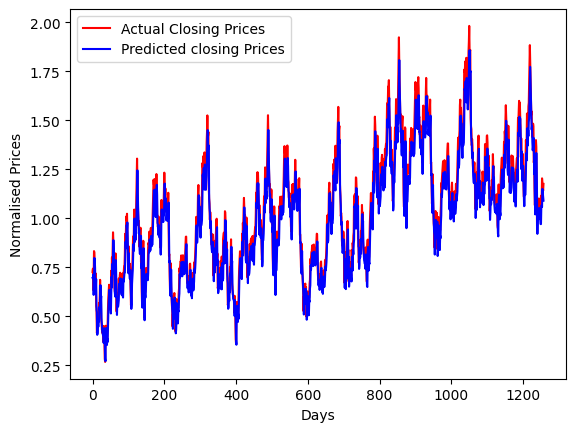

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - mae: 0.0550


In [25]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

train_mae = model.evaluate(trainX,trainY,batch_size=128,verbose=1)

In [26]:
model.fit(testX,testY,batch_size=128,epochs=40,validation_split=0.05)

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0110 - mae: 0.0823 - val_loss: 0.0073 - val_mae: 0.0684
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - mae: 0.0758 - val_loss: 0.0076 - val_mae: 0.0674
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - mae: 0.0756 - val_loss: 0.0069 - val_mae: 0.0667
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - mae: 0.0754 - val_loss: 0.0070 - val_mae: 0.0661
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mae: 0.0781 - val_loss: 0.0069 - val_mae: 0.0666
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - mae: 0.0773 - val_loss: 0.0074 - val_mae: 0.0686
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - mae: 0.0780 - val_loss: 0.0131 - val_mae: 0.0933
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - mae: 0.0817 - val_loss: 0.0071 - val_mae: 0.0676
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - m

MAE of Training Data

In [27]:
# Optionally evaluate on training data
train_mae = model.evaluate(trainX, trainY, batch_size=128, verbose=1)
print(f'Mean Absolute Error on Training Data: {train_mae}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - mae: 0.0561
Mean Absolute Error on Training Data: [0.00519790593534708, 0.05575549229979515]


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


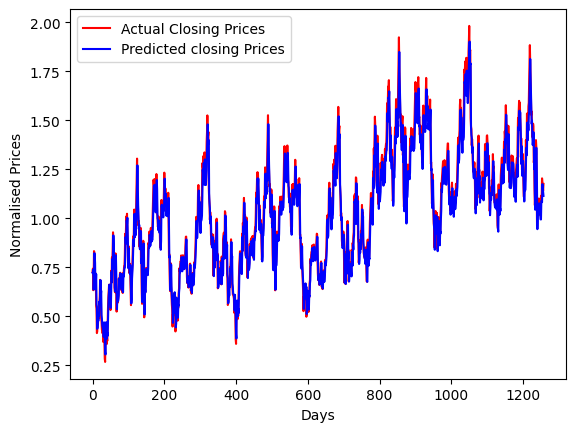

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - mae: 0.0561
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0600 
Mean Absolute Error on Test Data: [0.006383832078427076, 0.06267524510622025]


In [28]:
"""**Final Predictions**"""

import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

mae = model.evaluate(testX, testY, batch_size=128, verbose=1)
print(f'Mean Absolute Error on Test Data: {mae}')
